In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install keras

In [ ]:
import numpy as np
import cv2
import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.models import Sequential,Model
from keras.layers import Activation,Dense,Flatten,Dropout,MaxPooling2D,GlobalAveragePooling2D
import shutil as sh
import os
from keras.applications.xception import Xception
from PIL import Image
from keras.preprocessing import image

In [ ]:
dir_path = '/content/drive/My Drive/Colab Notebooks/Dataset/training_set'
dir_path2 = '/content/drive/My Drive/Colab Notebooks/Dataset/test_set' 


In [ ]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [ ]:
len(img_list)

1314

In [ ]:
  train=ImageDataGenerator(horizontal_flip=True,
                          vertical_flip=True,
                          validation_split=0.1,
                          rescale=1./255,
                          shear_range = 0.1,
                          zoom_range = 0.1,
                          width_shift_range = 0.1,
                          height_shift_range = 0.1,)

  test=ImageDataGenerator(rescale=1/255,
                          validation_split=0.1)

  train_generator=train.flow_from_directory(dir_path,
                                            target_size=(300,300),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='training')

  test_generator=test.flow_from_directory(dir_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='validation')

  labels = (train_generator.class_indices)
  print(labels)

  labels = dict((v,k) for k,v in labels.items())
  print(labels)

Found 1185 images belonging to 6 classes.
Found 129 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32, 6))

In [ ]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)


{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [ ]:
model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43808)            

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=callbacks_list) 

Epoch 1/100
71/71 [==============================] - 182s 3s/step - loss: 1.7517 - acc: 0.2652 - val_loss: 1.7137 - val_acc: 0.2902

Epoch 00001: val_acc improved from -inf to 0.29016, saving model to trained_model.h5
Epoch 2/100
71/71 [==============================] - 48s 669ms/step - loss: 1.6599 - acc: 0.2706 - val_loss: 1.6664 - val_acc: 0.3005

Epoch 00002: val_acc improved from 0.29016 to 0.30052, saving model to trained_model.h5
Epoch 3/100
71/71 [==============================] - 50s 706ms/step - loss: 1.6259 - acc: 0.2869 - val_loss: 1.5471 - val_acc: 0.3395

Epoch 00003: val_acc improved from 0.30052 to 0.33951, saving model to trained_model.h5
Epoch 4/100
71/71 [==============================] - 49s 685ms/step - loss: 1.5827 - acc: 0.2878 - val_loss: 1.2133 - val_acc: 0.4352

Epoch 00004: val_acc improved from 0.33951 to 0.43523, saving model to trained_model.h5
Epoch 5/100
71/71 [==============================] - 47s 657ms/step - loss: 1.4874 - acc: 0.3502 - val_loss: 2.89

Maximum Probability:  0.9222126
Classified: glass


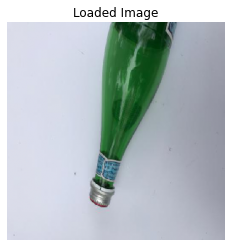

In [ ]:
from keras.preprocessing import image

img_path = '/content/drive/My Drive/Colab Notebooks/Dataset/test_set/glass/glass82.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)